C:\Users\Tuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI) between K-Means clusters and true labels: 0.0894


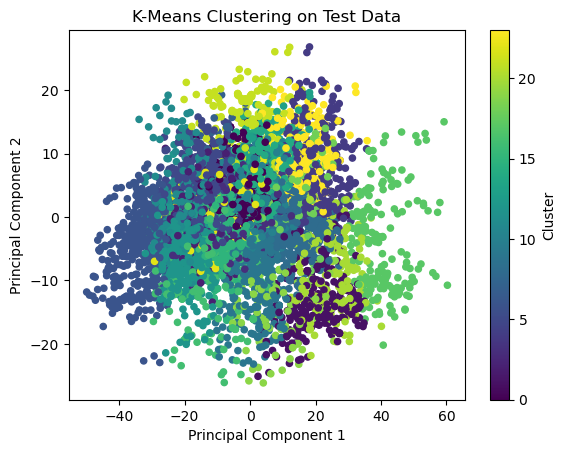

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

# Load your custom training CSV file
custom_train_data = pd.read_csv(r'sign_mnist_train.csv')

# Load your custom testing CSV file
custom_test_data = pd.read_csv(r'sign_mnist_test.csv')

# Extract features and labels from the training CSV file
X_train_custom = custom_train_data.drop(columns=['label']).values
y_train_custom = custom_train_data['label'].values

# Extract features and labels from the testing CSV file
X_test_custom = custom_test_data.drop(columns=['label']).values
y_test_custom = custom_test_data['label'].values

# Handling Missing Values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_custom)
X_test_imputed = imputer.transform(X_test_custom)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Dimensionality Reduction (PCA)
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# K-Means Clustering
kmeans = KMeans(n_clusters=24)  # Example, adjust as needed
kmeans.fit(X_train_pca)

# Predict clusters for the test set
test_clusters = kmeans.predict(X_test_pca)

# Calculate Adjusted Rand Index (ARI) between K-Means clusters and true labels
ari = adjusted_rand_score(y_test_custom, test_clusters)
print(f"Adjusted Rand Index (ARI) between K-Means clusters and true labels: {ari:.4f}")

# Visualize clusters (example)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_clusters, cmap='viridis', s=20)
plt.title('K-Means Clustering on Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
